In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:800px !important; }</style>"))

# Plot dei dati di un dataframe
In questo blog vogliamo mostrare come trattare un dataframe per le comuni operazioni di plotting dei dati

## Dataframe semplice 

In [1]:
# importa le librerie
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
giorni    =   ['10/01/2019',  '11/01/2019','12/01/2019','13/01/2019','14/01/2019' ]
citta=['Milano']
data=[]
localita=[]
sensore=[]
valmin=[]
valmax=[]
for g in giorni:
    for c in citta:
        data.append(g)
        localita.append(c)
        sensore.append('Temperatura')
        valmin.append(np.random.randint(0,5))
        valmax.append(np.random.randint(10,20))

tabella={'data':data,'localita':localita,'sensore':sensore,'valmin':valmin,'valmax':valmax}
df=pd.DataFrame(tabella)
df['data']=pd.to_datetime(df['data'],format='%d/%m/%Y')
df['data']=df['data'].dt.strftime('%d/%m/%Y')
display(df)

,data,localita,sensore,valmin,valmax
0,10/01/2019,Milano,Temperatura,2,16
1,11/01/2019,Milano,Temperatura,0,18
2,12/01/2019,Milano,Temperatura,4,10
3,13/01/2019,Milano,Temperatura,2,14
4,14/01/2019,Milano,Temperatura,3,13


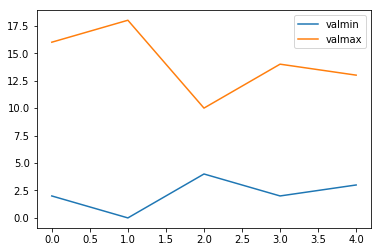

In [93]:
df.plot()

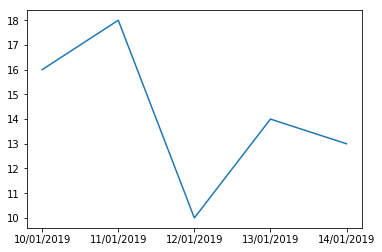

In [94]:

fig, ax = plt.subplots()
ax.plot(df.data,df.valmax)


# DataFrame piu complesso (da gestire group by)

In [95]:
giorni    =   ['10/01/2019',  '11/01/2019','12/01/2019' ]
citta=['Milano','Torino']
data=[]
localita=[]
sensore=[]
valmin=[]
valmax=[]
for g in giorni:
    for c in citta:
        data.append(g)
        localita.append(c)
        sensore.append('Pressione')
        valmin.append(np.random.randint(980,990))
        valmax.append(np.random.randint(990,1000))
        data.append(g)
        localita.append(c)
        sensore.append('Temperatura')
        valmin.append(np.random.randint(0,5))
        valmax.append(np.random.randint(6,15))

tabella={'data':data,'localita':localita,'sensore':sensore,'valmin':valmin,'valmax':valmax}
df=pd.DataFrame(tabella)
df['data']=pd.to_datetime(df['data'],format='%d/%m/%Y')
df['data']=df['data'].dt.strftime('%d/%m/%Y')
display(df)

,data,localita,sensore,valmin,valmax
0,10/01/2019,Milano,Pressione,981,998
1,10/01/2019,Milano,Temperatura,1,10
2,10/01/2019,Torino,Pressione,985,997
3,10/01/2019,Torino,Temperatura,2,14
4,11/01/2019,Milano,Pressione,981,995
5,11/01/2019,Milano,Temperatura,1,8
6,11/01/2019,Torino,Pressione,987,991
7,11/01/2019,Torino,Temperatura,0,8
8,12/01/2019,Milano,Pressione,989,996
9,12/01/2019,Milano,Temperatura,2,12


sensore
Pressione      AxesSubplot(0.125,0.125;0.775x0.755)
Temperatura    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

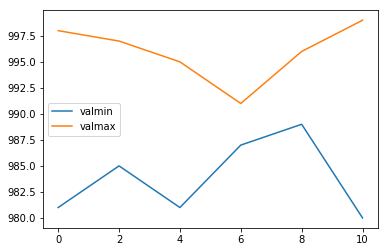

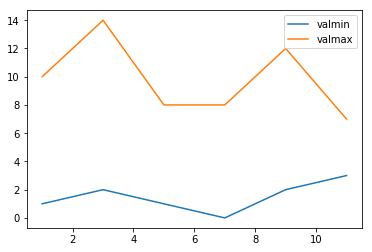

In [97]:
df.groupby('sensore').plot()

In [108]:
b=df.groupby(['data','localita','sensore'])
df2=gb.valmin.mean().unstack([1,2])
display(df2)
print(df2.index)

localita      Milano                Torino            
sensore    Pressione Temperatura Pressione Temperatura
data                                                  
10/01/2019       981           1       985           2
11/01/2019       981           1       987           0
12/01/2019       989           2       980           3

Index(['10/01/2019', '11/01/2019', '12/01/2019'], dtype='object', name='data')


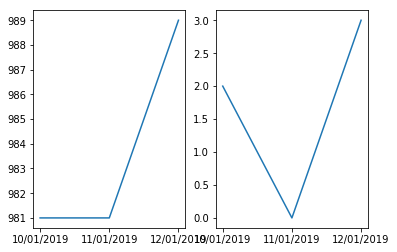

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(df2.index,df2.Milano.Pressione)
axes[1].plot(df2.index,df2['Torino']['Temperatura'])

#df2['Pressione'].plot(df2.index,ax=axes[0])
#df2['Temperatura'].plot(ax=axes[1])

## Formattiamo le label dell'asse x di formato DATA, e le ruotiamo

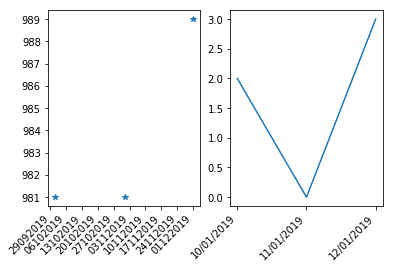

In [150]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

frmtY = DateFormatter('%d%m%Y')
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.xaxis_date()

ax1.plot_date( pd.to_datetime(df2.index),df2.Milano.Pressione,'*')
fig.autofmt_xdate(rotation=45)
ax1.xaxis.set_major_formatter(frmtY)
ax2.plot(df2.index,df2['Torino']['Temperatura'])



Come si vede ci sono le date per ogni punto piu degli interspazi che non ci servono.

Il grafico a sinistar utilizza plot_date(....), che mi consente di formattare la data 

il grafico a destra invece utilizza plot, e mi plotta i dati come stringa


In [119]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


formatter = DateFormatter('%Y-%m-%d %H:%M:%S')
axes[0].xaxis.set_major_formatter(formatter)

gb=df.groupby(['data','localita','sensore'])
df2=gb.valmin.mean().unstack([1,2])
display(df2)
print(df2.index)
print(df2.columns)
milano=df2[df2.columns.levels[0][0]]
print('df2.columns.levels[0]',df2.columns.levels[0])
print('df2.columns.levels[0][0]',df2.columns.levels[0][0])
display(milano)
print(milano.index)
pd.to_datetime(milano.index,format="%d/%m/%Y")


localita      Milano                Torino            
sensore    Pressione Temperatura Pressione Temperatura
data                                                  
10/01/2019       981           1       985           2
11/01/2019       981           1       987           0
12/01/2019       989           2       980           3

Index(['10/01/2019', '11/01/2019', '12/01/2019'], dtype='object', name='data')
MultiIndex(levels=[['Milano', 'Torino'], ['Pressione', 'Temperatura']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['localita', 'sensore'])
df2.columns.levels[0] Index(['Milano', 'Torino'], dtype='object', name='localita')
df2.columns.levels[0][0] Milano


sensore,Pressione,Temperatura
data,,
10/01/2019,981,1
11/01/2019,981,1
12/01/2019,989,2


Index(['10/01/2019', '11/01/2019', '12/01/2019'], dtype='object', name='data')


DatetimeIndex(['2019-01-10', '2019-01-11', '2019-01-12'], dtype='datetime64[ns]', name='data', freq=None)

In [85]:

# format the coords message box
def price(x):
    return 'A'

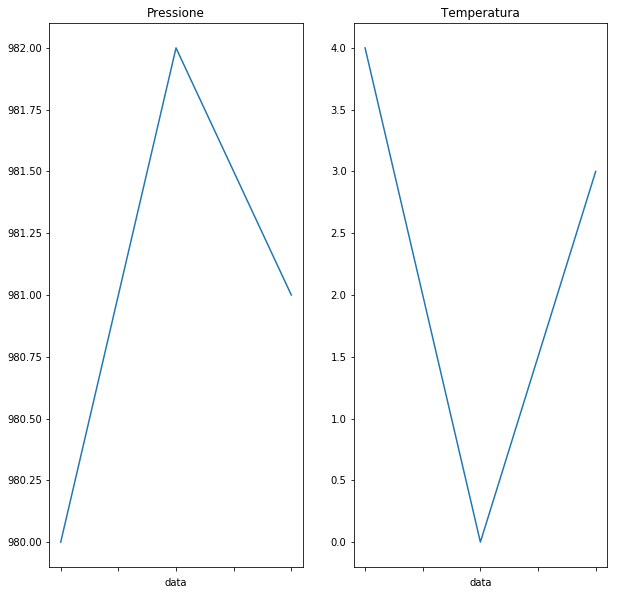

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
#axes[0].xaxis.set_major_formatter(formatter)

milano['Pressione'].plot(ax=axes[0],title='Pressione')
milano['Temperatura'].plot(ax=axes[1],title='Temperatura')
plt.show()